In [1]:
import pandas as pd
import numpy as np
from plotnine import *
import seaborn as sns
import folium

In [2]:
import matplotlib.pyplot as plt
plt.rc('font',family='Malgun Gothic')

In [4]:
data = pd.read_csv('D:/ESAA/소상공인시장진흥공단_상가업소정보_201806_01.csv', encoding='cp949')
data.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,28523551,엘가커피부산아시아드점,부산아시아드점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2647010100111980000009422,부산아시아드주경기장노외주차장,부산광역시 연제구 종합운동장로 7,611070,47500.0,NaN,1,NaN,129.062034,35.191284
1,28498271,비비안아울렛중계점,아울렛중계점,D,소매,D05,의복의류,D05A07,셔츠/내의/속옷,NaN,...,1135010600105090000010511,2001아울렛,서울특별시 노원구 동일로204가길 46,139726,1783.0,NaN,3,NaN,127.067888,37.641280
2,28512174,연세정신건강의학과의원,NaN,S,의료,S01,병원,S01B99,기타병원,NaN,...,1111017400102990000005842,유림문화사,서울특별시 종로구 종로 335-3,110540,3104.0,NaN,2,NaN,127.014500,37.573196
3,28499926,독일지멘스보청기은평점,은평점,D,소매,D20,의약/의료품소매,D20A02,보청기판매,G47812,...,1138010300102810108040063,NaN,서울특별시 은평구 통일로 732,122040,3368.0,NaN,2,NaN,126.929871,37.610888
4,28490321,서울모드,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010700105170027011767,SM빌딩,서울특별시 강남구 도산대로11길 29,135888,6034.0,NaN,1,NaN,127.022212,37.519315


In [5]:
data.shape

(476183, 39)

In [6]:
data.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [7]:
data.iloc[0,:]

상가업소번호                        28523551
상호명                        엘가커피부산아시아드점
지점명                            부산아시아드점
상권업종대분류코드                            Q
상권업종대분류명                            음식
상권업종중분류코드                          Q12
상권업종중분류명                        커피점/카페
상권업종소분류코드                       Q12A01
상권업종소분류명                   커피전문점/카페/다방
표준산업분류코드                        I56220
표준산업분류명                       비알콜 음료점업
시도코드                                26
시도명                              부산광역시
시군구코드                            26470
시군구명                               연제구
행정동코드                       2647062000
행정동명                              거제2동
법정동코드                       2647010100
법정동명                               거제동
지번코드               2647010100212080000
대지구분코드                               1
대지구분명                               대지
지번본번지                             1208
지번부번지                              NaN
지번주소                부산광역시 연제구 거제동 1208
도로명코드                    

In [8]:
data.iloc[1,:]

상가업소번호                        28498271
상호명                          비비안아울렛중계점
지점명                             아울렛중계점
상권업종대분류코드                            D
상권업종대분류명                            소매
상권업종중분류코드                          D05
상권업종중분류명                          의복의류
상권업종소분류코드                       D05A07
상권업종소분류명                      셔츠/내의/속옷
표준산업분류코드                           NaN
표준산업분류명                            NaN
시도코드                                11
시도명                              서울특별시
시군구코드                            11350
시군구명                               노원구
행정동코드                       1135062500
행정동명                            중계2.3동
법정동코드                       1135010600
법정동명                               중계동
지번코드               1135010600205090000
대지구분코드                               1
대지구분명                               대지
지번본번지                              509
지번부번지                              NaN
지번주소                 서울특별시 노원구 중계동 509
도로명코드                    

# 스타벅스 상권 분석

In [9]:
coffee = data[data['상권업종소분류명'].str.contains('커피')]
coffee.shape

(18759, 39)

In [10]:
coffee['상호명'].unique().shape

(13472,)

18759개의 커피전문점 중 13472개의 상호명 존재

In [11]:
coffee['상호명'].value_counts()

이디야커피                 459
스타벅스                  308
간단하지만특별한화피디Cafe       191
투썸플레이스                129
커피빈                   125
                     ... 
신세계베이킹카페연세대학교제중학사점      1
란커피                     1
리본                      1
랍슨                      1
카페루프탑                   1
Name: 상호명, Length: 13472, dtype: int64

'스타벅스', '커피빈' 처럼 그냥 브랜드 이름만 있는 경우도 있지만 위에서 확인해본 것과 같이 '커피빈ㅇㅇ점' 처럼 지점명도 함께 포함되어있는 경우 존재

In [21]:
coffee.시도명.unique()

array(['부산광역시', '서울특별시'], dtype=object)

In [22]:
coffee.시도명.value_counts()

서울특별시    14662
부산광역시     4097
Name: 시도명, dtype: int64

서울과 부산의 데이터만 존재

## 서울시 스타벅스 확인

In [53]:
seoul = coffee[coffee["시도명"]=="서울특별시"]

In [54]:
seoul.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
4,28490321,서울모드,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010700105170027011767,SM빌딩,서울특별시 강남구 도산대로11길 29,135888,6034.0,NaN,1,NaN,127.022212,37.519315
19,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675
25,20020124,스완카페트,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1156013300106040056037792,NaN,서울특별시 영등포구 도신로10가길 11-1,150070,7379.0,NaN,2,NaN,126.897710,37.503693
34,19973708,왕실,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1114012700101050000019781,NaN,서울특별시 중구 남대문로 52-13,100810,4535.0,NaN,1,NaN,126.982419,37.562274
38,20004707,커피빈,코리아교대점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1165010800116570005024412,카이스시스템빌딩,서울특별시 서초구 서초중앙로 118,137070,6634.0,NaN,1,NaN,127.014217,37.492388


In [55]:
starbucks = seoul[seoul['상호명'].str.contains('스타벅스')]
starbucks

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
1682,19998811,스타벅스종로3가점,종로3가점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1111015600100090003016323,NaN,서울특별시 종로구 종로 113-1,110123,3139.0,NaN,1,NaN,126.990207,37.570585
12518,20283351,스타벅스커피여의도IFC1F,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1156011000100230000000001,서울국제금융센터,서울특별시 영등포구 국제금융로 10,150945,7326.0,NaN,3,NaN,126.924863,37.525172
12543,20288646,스타벅스,삼성역점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010500101680026016641,제일빌딩,서울특별시 강남구 테헤란로103길 9,135090,6173.0,NaN,1,NaN,127.063878,37.510038
13302,20597950,스타벅스,신림포도몰점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1162010200116410002000002,포도몰,서울특별시 관악구 신림로 330,151930,8777.0,NaN,1,NaN,126.930216,37.483845
13384,20825451,스타벅스신림사거리점,신림사거리점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1162010200114220037013287,영일빌딩,서울특별시 관악구 남부순환로 1619,151890,8754.0,NaN,2,NaN,126.930487,37.484631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470389,15954797,스타벅스,신용산역점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1117012500103420000013530,래미안용산,서울특별시 용산구 한강대로 95,140871,4378.0,NaN,1,103,126.966401,37.528760
470523,16138463,스타벅스,독립문역점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1111018000100120001020675,경희궁자이4단지,서울특별시 종로구 송월길 155,110100,3165.0,NaN,20,NaN,126.961371,37.571632
472654,16138969,스타벅스,광화문우체국점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1111012300101540001017647,광화문우체국,서울특별시 종로구 종로 6,110110,3187.0,NaN,15,NaN,126.978082,37.569832
472976,16109325,스타벅스,송파개롱역점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1171011200100200017013920,NaN,서울특별시 송파구 마천로7길 14,138855,5656.0,NaN,NaN,NaN,127.128172,37.508989


In [56]:
starbucks.shape

(437, 39)

In [57]:
starbucks.상호명.unique()

array(['스타벅스종로3가점', '스타벅스커피여의도IFC1F', '스타벅스', '스타벅스신림사거리점', '스타벅스커피홍대역',
       '스타벅스새문안로점', '스타벅스올림픽평화의문점', '스타벅스연신내역', '스타벅스가락시장역점', '스타벅스외대점',
       '스타벅스연세백양로점', '스타벅스명지대점', '스타벅스석촌역', '스타벅스연대동문', '스타벅스압구정로데오역',
       '스타벅스서울대입구역점', '스타벅스신림점', '스타벅스강남삼성타운점', '스타벅스사당점', '스타벅스광장점',
       '스타벅스신촌명물거리점', '스타벅스명동미래', '스타벅스건국클래식점', '스타벅스연희DT점', '스타벅스삼선교점',
       '스타벅스올림픽공원북문점', '스타벅스커피여의도호성', '스타벅스충정타워', '스타벅스종각점', '스타벅스방배카페입구',
       '스타벅스이수역점', '스타벅스W-MALL점', '스타벅스천호로데오점', '스타벅스마포일진빌딩점', '스타벅스용산역점',
       '스타벅스명동메트로', '스타벅스중계역점', '스타벅스마포아크로타워점', '스타벅스남부터미널2점',
       '스타벅스중랑구청점', '스타벅스구로디지털로점', '스타벅스논현힐탑', '스타벅스종로관수점', '스타벅스삼성도심공항점',
       '스타벅스종로2가점', '스타벅스선정릉역점', '스타벅스미아역점', '스타벅스선릉로점', '스타벅스역삼럭키',
       '스타벅스커피신도림디큐브시티B2', '스타벅스이태원거리점', '스타벅스구로에이스트윈타워1점', '스타벅스을지로입구',
       '스타벅스교대역점', '스타벅스서울중앙우체국점', '스타벅스남산스테이트', '스타벅스구로하이엔드점',
       '스타벅스명일이마트점', '스타벅스조선호텔후문', '스타벅스목동점', '스타벅스삼성교점', '스타벅스서울교대점',
       '스타벅스커리학동사거리점', '스타벅스강북구청사거리점', '스타벅스청담사거리점', '스타벅스방이역점',
       '스타

In [58]:
starbucks.isnull().sum()

상가업소번호         0
상호명            0
지점명           30
상권업종대분류코드      0
상권업종대분류명       0
상권업종중분류코드      0
상권업종중분류명       0
상권업종소분류코드      0
상권업종소분류명       0
표준산업분류코드       0
표준산업분류명        0
시도코드           0
시도명            0
시군구코드          0
시군구명           0
행정동코드          0
행정동명           0
법정동코드          0
법정동명           0
지번코드           0
대지구분코드         0
대지구분명          0
지번본번지          0
지번부번지        101
지번주소           0
도로명코드          0
도로명            0
건물본번지          0
건물부번지        416
건물관리번호         0
건물명           98
도로명주소          0
구우편번호          0
신우편번호          0
동정보          425
층정보           50
호정보          389
경도             0
위도             0
dtype: int64

지점명 없는 경우 존재

In [59]:
starbucks.loc[starbucks['지점명'].isnull()==True, ["상호명", "지점명","시군구명","행정동명","지번주소","도로명주소","경도","위도"]]

,상호명,지점명,시군구명,행정동명,지번주소,도로명주소,경도,위도
12518,스타벅스커피여의도IFC1F,NaN,영등포구,여의동,서울특별시 영등포구 여의도동 23,서울특별시 영등포구 국제금융로 10,126.924863,37.525172
23885,스타벅스커피홍대역,NaN,마포구,서교동,서울특별시 마포구 동교동 159-1,서울특별시 마포구 양화로 165,126.923599,37.557202
35141,스타벅스연신내역,NaN,은평구,대조동,서울특별시 은평구 대조동 198-10,서울특별시 은평구 연서로 216,126.920110,37.617800
42941,스타벅스석촌역,NaN,송파구,석촌동,서울특별시 송파구 석촌동 286-9,서울특별시 송파구 백제고분로 358,127.106013,37.504246
44484,스타벅스압구정로데오역,NaN,강남구,청담동,서울특별시 강남구 청담동 84-3,서울특별시 강남구 선릉로 836,127.040513,37.526538
50170,스타벅스명동미래,NaN,중구,명동,서울특별시 중구 명동1가 48-2,서울특별시 중구 명동7길 8,126.984532,37.564166
54189,스타벅스커피여의도호성,NaN,영등포구,여의동,서울특별시 영등포구 여의도동 44-22,서울특별시 영등포구 여의대방로65길 24,126.929275,37.520437
54595,스타벅스충정타워,NaN,서대문구,충현동,서울특별시 서대문구 충정로3가 464,서울특별시 서대문구 서소문로 21,126.964070,37.559888
56662,스타벅스방배카페입구,NaN,서초구,방배본동,서울특별시 서초구 방배동 755-14,서울특별시 서초구 방배중앙로 204,126.985677,37.497237
64742,스타벅스명동메트로,NaN,중구,명동,서울특별시 중구 을지로2가 199-33,서울특별시 중구 명동9가길 14,126.983716,37.565123


지점명 없으면 대부분 상호명에 지점이 포함되어있고 지점명 포함되지 않은 경우에도 주소로 위치 파악 가능

In [60]:
starbucks['위도'] = starbucks['위도'].astype(float)
starbucks['경도'] = starbucks['경도'].astype(float)

C:\ProgramData\Anaconda3\envs\testtest\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\envs\testtest\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<AxesSubplot:xlabel='경도', ylabel='위도'>

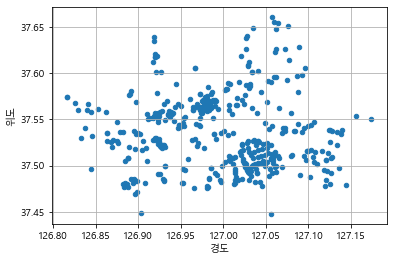

In [61]:
 (ggplot(starbucks)
  + aes(x='경도', y='위도')
  + geom_point()
  + theme(text=element_text(family='NanumBarunGothic'))
 )


starbucks.plot.scatter(x="경도", y="위도", grid="True")

In [62]:
starbucks['브랜드명'] = ''
starbucks.loc[starbucks['상호명'].str.contains('스타벅스'), '브랜드명'] = '스타벅스'

C:\ProgramData\Anaconda3\envs\testtest\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\envs\testtest\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [63]:
map = folium.Map(location=[starbucks['위도'].mean(), starbucks['경도'].mean()], zoom_start=12, tiles='Stamen Toner')

for n in starbucks.index:
    popup_name = starbucks['브랜드명'][n] + ' - ' + starbucks['도로명주소'][n]
    icon_color = 'red'
    
    # folium.features.CircleMarker 오류가 날 경우 --> folium.vector_layer.CircleMarker
    folium.CircleMarker(
        location=[starbucks['위도'][n], starbucks['경도'][n]],
        radius=3,
        popup=popup_name,
        color= icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)

In [64]:
map

In [66]:
seoul.groupby(['시군구명'])['상호명'].count()

시군구명
강남구     1774
강동구      476
강북구      231
강서구      559
관악구      438
광진구      563
구로구      510
금천구      313
노원구      466
도봉구      261
동대문구     346
동작구      360
마포구     1008
서대문구     616
서초구      998
성동구      418
성북구      504
송파구      717
양천구      383
영등포구     850
용산구      480
은평구      405
종로구      961
중구       758
중랑구      267
Name: 상호명, dtype: int64

In [88]:
seoul_brand = pd.DataFrame(
    seoul.groupby(['시군구명'])['상호명'].count()
).sort_values(['상호명'], ascending=False).reset_index()
seoul_brand.columns = ['구', '매장수']
seoul_brand

,구,매장수
0,강남구,1774
1,마포구,1008
2,서초구,998
3,종로구,961
4,영등포구,850
5,중구,758
6,송파구,717
7,서대문구,616
8,광진구,563
9,강서구,559


<AxesSubplot:xlabel='구', ylabel='매장수'>

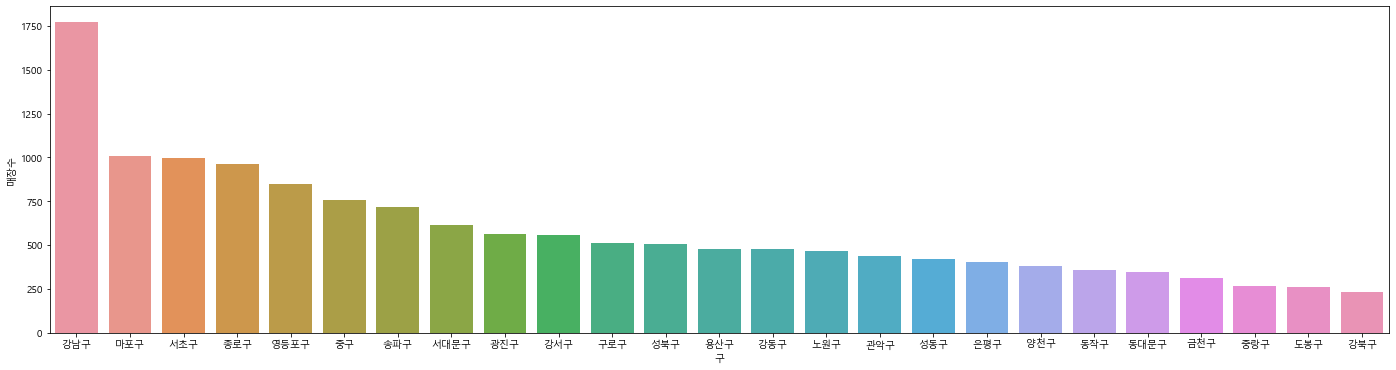

In [83]:
(ggplot(seoul_brand)
 + aes(x='구', y='매장수')
 + geom_bar(stat='identity', position='dodge') #position='dodge' 제거하면 한 바에 브랜드명 들이 같이 표시 (두개를 더한 수 표시)
 + ggtitle('구별 스타벅스 매장수')
 + theme(text=element_text(family='NanumBarunGothic'),
        axis_text_x=element_text(rotation=60), 
        figure_size=(8, 4))
)

plt.figure(figsize=(24, 6))
sns.barplot(data=seoul_brand, x='구', y='매장수')


서울시의 경우, 강남구에 스타벅스 매장 수가 압도적으로 많고 그 다음으로는 마포구, 서초구, 종로구 순서로 매장 수가 많다.

## 부산시 스타벅스

In [41]:
busan = coffee[coffee["시도명"]=="부산광역시"]

In [42]:
busan.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,28523551,엘가커피부산아시아드점,부산아시아드점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2647010100111980000009422,부산아시아드주경기장노외주차장,부산광역시 연제구 종합운동장로 7,611070,47500.0,NaN,1,NaN,129.062034,35.191284
611,23159194,카페크레마,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2671032022107190001000001,미래안전통상가,부산광역시 기장군 정관읍 정관6로 5-20,619963,46017.0,NaN,NaN,NaN,129.175380,35.320503
652,23390038,아우르미카페,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2629010900103530001032189,NaN,부산광역시 남구 지게골로 56,608040,48465.0,NaN,NaN,NaN,129.070922,35.135626
1030,25582255,하드록카페부산,부산점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2635010600114010004029572,신한은행,부산광역시 해운대구 해운대해변로298번길 13,612010,48099.0,NaN,NaN,7,129.165032,35.161502
1504,25480691,상록수커피숍,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2653010400105160052014367,올리비아로렌,부산광역시 사상구 사상로 251,617808,46963.0,NaN,2,NaN,128.982038,35.167234


In [43]:
starbucks = busan[busan['상호명'].str.contains('스타벅스')]
starbucks

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
39290,20246800,스타벅스,센텀드림월드점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2635010500115100000000001,센텀드림월드,부산광역시 해운대구 센텀2로 25,612020,48060.0,NaN,1,NaN,129.132980,35.166962
42955,20058878,스타벅스,팔레드시즈점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2635010600111240005000001,팔레드시즈,부산광역시 해운대구 해운대해변로298번길 24,612010,48099.0,NaN,NaN,NaN,129.166605,35.160216
44379,3430340,스타벅스,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2629010600117400001006927,이지스퀘어빌딩,부산광역시 남구 수영로 240-1,608020,48496.0,1,1,NaN,129.093068,35.134951
53822,23767634,스타벅스,BIFC몰점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2629010900112290001000001,부산국제금융센터,부산광역시 남구 문현금융로 40,608040,48400.0,A,NaN,135,129.065885,35.146505
55893,20031629,스타벅스,남천점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2650010500100030035017725,NaN,부산광역시 수영구 남천바다로 38,613010,48304.0,NaN,1,NaN,129.114208,35.148324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453458,15991030,스타벅스,동서대DT점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2653010600101890009025772,NaN,부산광역시 사상구 가야대로 338,617835,47007.0,NaN,2,1,129.009693,35.150700
459330,16031013,스타벅스,온천장역DT점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2641010800106070006035426,NaN,부산광역시 금정구 식물원로 13,609842,46301.0,NaN,NaN,NaN,129.086559,35.223949
468463,15987679,스타벅스,온천장역DT점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2641010800106070006014928,세창자동차정비,부산광역시 금정구 식물원로 13,609842,46301.0,NaN,NaN,NaN,129.086484,35.224085
472000,16106058,스타벅스,센텀파크점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2635010400112000000003828,더샵센텀파크1차아파트,부산광역시 해운대구 센텀중앙로 145,612712,48050.0,NaN,NaN,NaN,129.123620,35.176775


In [44]:
starbucks.shape

(100, 39)

In [45]:
starbucks.상호명.unique()

array(['스타벅스', '스타벅스부산서면', '스타벅스금정이마트점', '스타벅스서면센트럴스퀘어점', '스타벅스서면중앙점',
       '스타벅스센텀신세계B1', '스타벅스부산서면점', '스타벅스센텀그린타워점', '스타벅스하단역점', '스타벅스부산초량점',
       'PPANGJIP(스타벅스재능기부카페2호점)', '스타벅스센텀KNN점', '스타벅스부산교대역점',
       '스타벅스동의대역점동의대역점', '스타벅스해운대점', '스타벅스명지오션시티점', '스타벅스부산프리미엄점',
       '스타벅스부산재송DT점', '스타벅스광안비치점', '스타벅스동부산DT', '스타벅스을숙도강변DT점',
       '스타벅스서면NC점', '스타벅스사직구장점', '스타벅스연산시티타워점', '스타벅스자갈치역점', '스타벅스동명대DT점',
       '스타벅스국제시장점'], dtype=object)

In [46]:
starbucks.isnull().sum()

상가업소번호        0
상호명           0
지점명           6
상권업종대분류코드     0
상권업종대분류명      0
상권업종중분류코드     0
상권업종중분류명      0
상권업종소분류코드     0
상권업종소분류명      0
표준산업분류코드      0
표준산업분류명       0
시도코드          0
시도명           0
시군구코드         0
시군구명          0
행정동코드         0
행정동명          0
법정동코드         0
법정동명          0
지번코드          0
대지구분코드        0
대지구분명         0
지번본번지         0
지번부번지        22
지번주소          0
도로명코드         0
도로명           0
건물본번지         0
건물부번지        87
건물관리번호        0
건물명          45
도로명주소         0
구우편번호         0
신우편번호         0
동정보          96
층정보          39
호정보          86
경도            0
위도            0
dtype: int64

지점명 없는 경우 존재

In [47]:
starbucks.loc[starbucks['지점명'].isnull()==True, ["상호명", "지점명","시군구명","행정동명","지번주소","도로명주소","경도","위도"]]

,상호명,지점명,시군구명,행정동명,지번주소,도로명주소,경도,위도
44379,스타벅스,NaN,남구,대연1동,부산광역시 남구 대연동 1740-1,부산광역시 남구 수영로 240-1,129.093068,35.134951
79066,스타벅스부산서면,NaN,부산진구,부전2동,부산광역시 부산진구 부전동 219-3,부산광역시 부산진구 중앙대로692번길 46-10,129.061572,35.154115
157231,스타벅스센텀신세계B1,NaN,해운대구,우2동,부산광역시 해운대구 우동 1495,부산광역시 해운대구 센텀남대로 35,129.129107,35.168657
370401,스타벅스동부산DT,NaN,기장군,기장읍,부산광역시 기장군 기장읍 시랑리 589-6,부산광역시 기장군 기장읍 기장해안로 54,129.211027,35.184072
392483,스타벅스동부산DT,NaN,기장군,기장읍,부산광역시 기장군 기장읍 시랑리 589-6,부산광역시 기장군 기장읍 기장해안로 56,129.210830,35.184110
429539,스타벅스,NaN,중구,중앙동,부산광역시 중구 대창동1가 54-67,부산광역시 중구 중앙대로115번길 1-6,129.035853,35.107915


지점명 없으면 대부분 상호명에 지점이 포함되어있고 지점명 포함되지 않은 경우에도 주소로 위치 파악 가능

In [48]:
starbucks['위도'] = starbucks['위도'].astype(float)
starbucks['경도'] = starbucks['경도'].astype(float)

C:\ProgramData\Anaconda3\envs\testtest\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\envs\testtest\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<AxesSubplot:xlabel='경도', ylabel='위도'>

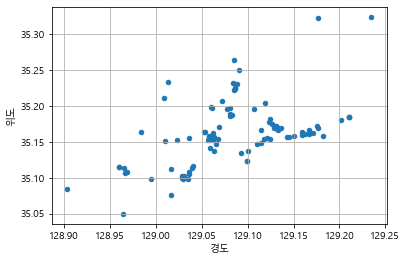

In [49]:
 (ggplot(starbucks)
  + aes(x='경도', y='위도')
  + geom_point()
  + theme(text=element_text(family='NanumBarunGothic'))
 )


starbucks.plot.scatter(x="경도", y="위도", grid="True")

In [50]:
starbucks['브랜드명'] = ''
starbucks.loc[starbucks['상호명'].str.contains('스타벅스'), '브랜드명'] = '스타벅스'

C:\ProgramData\Anaconda3\envs\testtest\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\envs\testtest\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [51]:
map = folium.Map(location=[starbucks['위도'].mean(), starbucks['경도'].mean()], zoom_start=12, tiles='Stamen Toner')

for n in starbucks.index:
    popup_name = starbucks['브랜드명'][n] + ' - ' + starbucks['도로명주소'][n]
    icon_color = 'red'
    
    # folium.features.CircleMarker 오류가 날 경우 --> folium.vector_layer.CircleMarker
    folium.CircleMarker(
        location=[starbucks['위도'][n], starbucks['경도'][n]],
        radius=3,
        popup=popup_name,
        color= icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)

In [52]:
map

In [73]:
busan.groupby(['시군구명'])['상호명'].count()

시군구명
강서구     169
금정구     326
기장군     249
남구      261
동구      166
동래구     273
부산진구    537
북구      196
사상구     227
사하구     229
서구      126
수영구     241
연제구     213
영도구     138
중구      270
해운대구    476
Name: 상호명, dtype: int64

In [87]:
busan_brand = pd.DataFrame(
    busan.groupby(['시군구명'])['상호명'].count()
).sort_values(['상호명'], ascending=False).reset_index()
busan_brand.columns = ['구', '매장수']
busan_brand

,구,매장수
0,부산진구,537
1,해운대구,476
2,금정구,326
3,동래구,273
4,중구,270
5,남구,261
6,기장군,249
7,수영구,241
8,사하구,229
9,사상구,227


<AxesSubplot:xlabel='구', ylabel='매장수'>

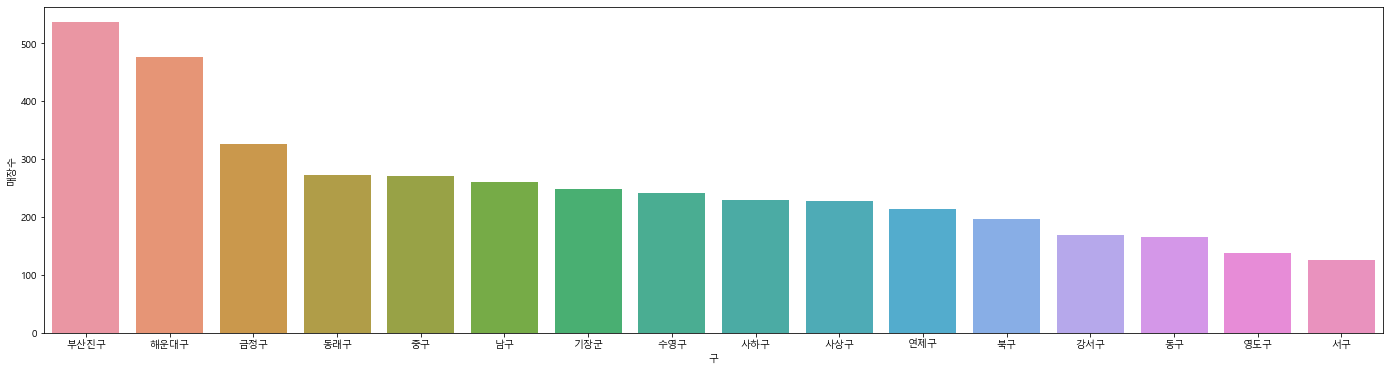

In [86]:
(ggplot(busan_brand)
 + aes(x='구', y='매장수')
 + geom_bar(stat='identity', position='dodge') #position='dodge' 제거하면 한 바에 브랜드명 들이 같이 표시 (두개를 더한 수 표시)
 + ggtitle('구별 스타벅스 매장수')
 + theme(text=element_text(family='NanumBarunGothic'),
        axis_text_x=element_text(rotation=60), 
        figure_size=(8, 4))
)

plt.figure(figsize=(24, 6))
sns.barplot(data=busan_brand, x='구', y='매장수')


부산시의 경우, 부산진구와 해운대구에 스타벅스 매장 수가 가장 많고 그 다음으로 금정구, 동래구, 중구 순서대로 많다.